170498071/170498071 [==============================] - 6s 0us/step
Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


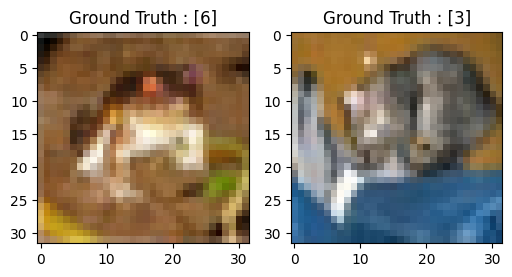

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
print(train_labels)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[6,3])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='Blues')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='Blues')
plt.title("Ground Truth : {}".format(test_labels[0]))
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')


train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print(train_labels_one_hot)
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])
model = Sequential()
    # The first two layers with 32 filters of window size 3x3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))
batch_size = 256
epochs = 50
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
model.evaluate(test_data, test_labels_one_hot)
model.save('cifar10_trained_model.h5')

In [10]:
import cv2
import numpy as np
from keras.models import load_model

# Load your trained model
model = load_model('/content/cifar10_trained_model.h5')

# Modify the image path to the path of your image
image_path = '/content/dog2.jpg'

# Load your own image
image = cv2.imread(image_path)

# Preprocess your image
# Resize to match the input size of your model
# For example, if your model expects images of size (32, 32, 3)
image = cv2.resize(image, (32, 32))
# Convert to float32 and normalize
image = image.astype('float32') / 255.0
# Reshape to match the input shape of your model
image = np.expand_dims(image, axis=0)

# Make predictions
predictions = model.predict(image)

# Interpret predictions
# Assuming your model outputs probabilities for each class
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = class_labels[np.argmax(predictions)]

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 92ms/step
Predicted Class: dog
